## **EDA**
-----------
In this project, we perform data cleaning and preprocessing on the taxis dataset, focusing on handling missing values and outliers. 

In [1]:
#importing libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## **1. Load and Examine the Dataset**

In [11]:
taxis = sns.load_dataset("taxis")
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


## **2. Dataset Overview**
___________________________________
The dataset contains the following columns:

**pickup:** Datetime of the taxi pickup.

**dropoff:** Datetime of the taxi dropoff.

**passengers:** Number of passengers in the taxi.

**distance:** Distance of the trip in miles.

**fare:** Fare amount in dollars.

**tip:** Tip amount in dollars.

**tolls:** Tolls amount in dollars.

**total:** Total amount paid for the ride (fare + tip + tolls).

**color:** Color of the taxi.

**payment:** Payment method (e.g., cash, card).

**pickup_zone:** Zone where the ride was picked up.

**dropoff_zone:** Zone where the ride was dropped off.

**pickup_borough:** Borough of the pickup location.

**dropoff_borough:** Borough of the dropoff location.

In [12]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [14]:
taxis.describe(include='all')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,NaN,NaN,NaN,NaN,NaN,NaN


## **3. Data Cleaning**

First, we need to clean the data by checking for missing values and handling them if necessary:

In [15]:
# Check for missing values
taxis.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [16]:
taxis.shape

(6433, 14)

In [28]:
# Fill missing values with the most common (mode) value
taxis['payment'].mode()
taxis['payment']=taxis['payment'].fillna(taxis['payment'].mode()[0])

In [29]:
# Verify if missing values are filled
print(taxis['payment'].isnull().sum())

0


In [30]:
# Fill missing values in 'pickup_zone' with a placeholder 'unknown'
taxis['pickup_zone'] = taxis['pickup_zone'].fillna('unknown')

# Verify if missing values are filled
print(taxis['pickup_zone'].isnull().sum())

0


In [31]:
# Fill missing values in 'dropoff_zone' with a placeholder 'unknown'
taxis['dropoff_zone'] = taxis['dropoff_zone'].fillna('unknown')

# Verify if missing values are filled
print(taxis['dropoff_zone'].isnull().sum())

0


In [32]:
# Forward fill missing values in 'pickup_borough' and 'dropoff_borough'
taxis['pickup_borough'] = taxis['pickup_borough'].fillna(method='ffill')
taxis['dropoff_borough'] = taxis['dropoff_borough'].fillna(method='ffill')
# Verify if missing values are filled
print(taxis['pickup_borough'].isnull().sum())
print(taxis['dropoff_borough'].isnull().sum())

0
0


In [33]:
#All missing values are handled
taxis.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

## **4. Descriptive Statistics**

In [35]:
# Descriptive statistics
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


## **5. Exploratory Data Analysis (EDA) with Visualization**

**a. Distribution of Continuous Variables**

Fare Distribution: Use a Histogram and KDE Plot to visualize the distribution of fares.

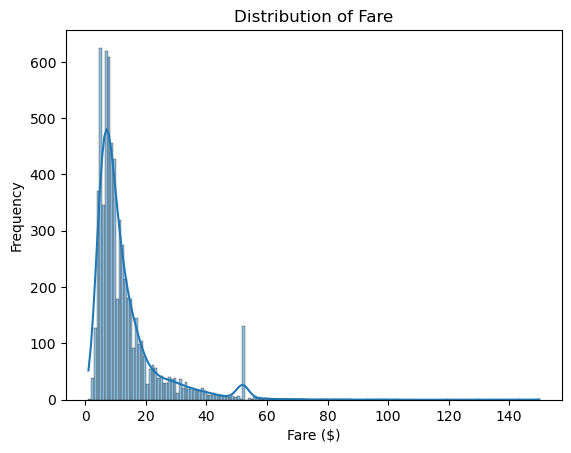

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fare distribution
sns.histplot(taxis['fare'],kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.show()

#### **ANALYSIS**

In the plot:

	•	Most fares appear to be clustered in the lower range, around $0 to $20, as indicated by the high peak in that area.
	•	There are fewer instances as the fare increases, with a long tail extending to the right, showing occasional higher fare values.
	•	A small spike around $50 may indicate a common fare amount in that range.
	•	The distribution is heavily right-skewed, meaning most fares are low, with a few high values pushing the distribution to the right.

This type of distribution is typical for fare data, where lower fares are more frequent, and higher fares are rare.

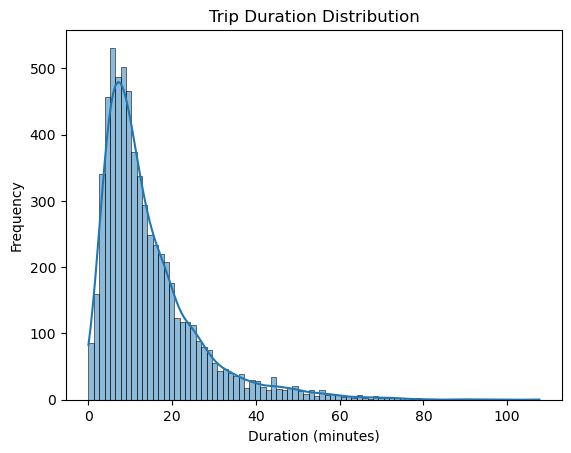

In [39]:
# Convert to datetime
taxis['pickup'] = pd.to_datetime(taxis['pickup'])
taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])

# Calculate trip duration
taxis['trip_duration'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds() / 60  # in minutes

# Plot trip duration
sns.histplot(taxis['trip_duration'], kde=True)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **ANALYSIS**

In the plot:

	•	Most trip durations are clustered around the lower end, particularly from 0 to around 15 minutes, as shown by the high peak in this area.
	•	As the trip duration increases, the frequency of trips decreases, creating a long tail on the right. This indicates that while most trips are short, a few trips last much longer, extending to over 100 minutes.
	•	The distribution is heavily right-skewed, meaning the data is concentrated around shorter trips with a few longer trips stretching the distribution to the right.

This type of distribution is typical for taxi trip data, where short trips are more common, and long trips are rare.

**b. Relationship Between Variables**

Fare vs Distance: A scatter plot can show how the fare increases with distance

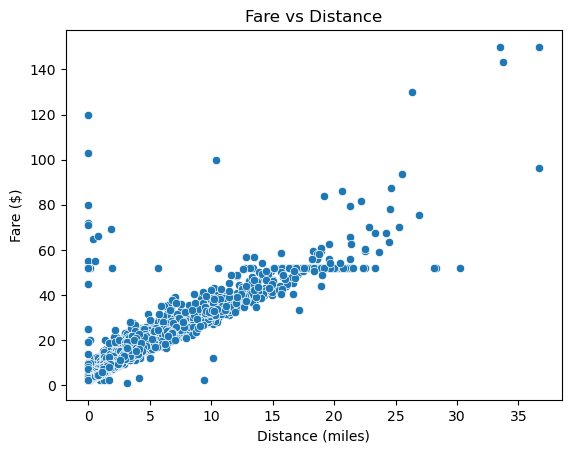

In [40]:
sns.scatterplot(x='distance', y='fare', data=taxis)
plt.title('Fare vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')
plt.show()


#### **ANALYSIS**

This scatter plot will help identify if longer trips generally correspond to higher fares.

Fare vs Tip: A scatter plot or line plot can show the relationship between fare and tip amounts.

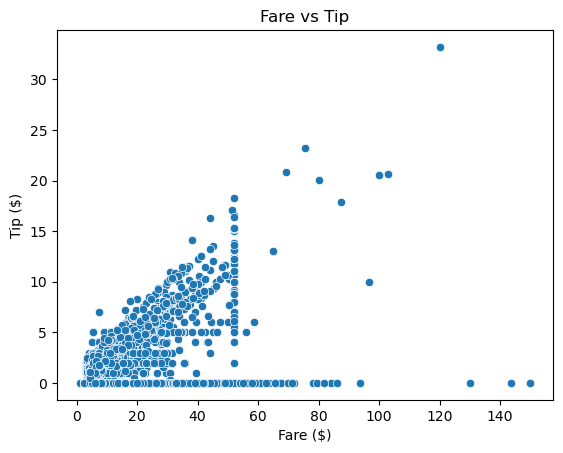

In [41]:
sns.scatterplot(x='fare', y='tip', data=taxis)
plt.title('Fare vs Tip')
plt.xlabel('Fare ($)')
plt.ylabel('Tip ($)')
plt.show()

#### **ANALYSIS:**
Typically, higher fares lead to higher tips, and this plot can help identify the correlation between these variables.

**c. Categorical Data Analysis**

Passenger Count vs. Fare: A boxplot can be used to understand the distribution of fare across different passenger counts.

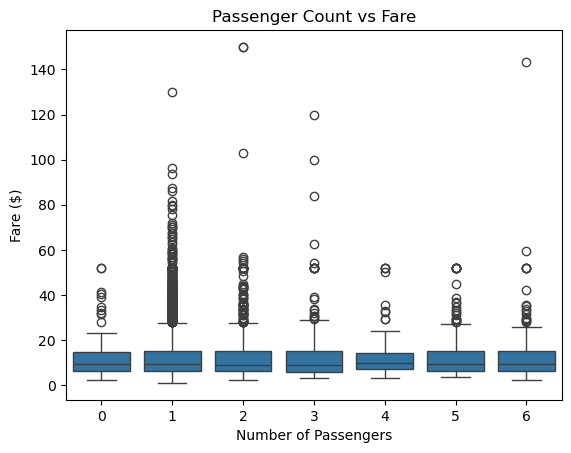

In [42]:
sns.boxplot(x='passengers', y='fare', data=taxis)
plt.title('Passenger Count vs Fare')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare ($)')
plt.show()


#### **ANALYSIS**
The plot suggests that there isn’t a strong correlation between the number of passengers and fare amounts. 
High fares occur across all passenger counts, indicating that factors other than the number of passengers 
(such as trip distance or duration) are likely more influential in determining fare.

Payment Method Distribution: A count plot can be used to show the distribution of payment methods.

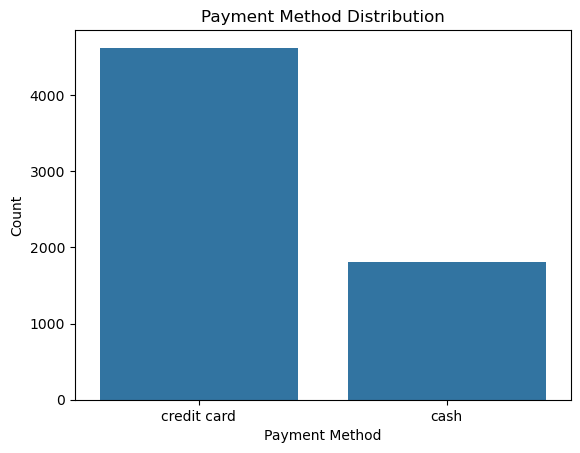

In [43]:
sns.countplot(x='payment', data=taxis)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

#### **ANALYSIS:** 
This count plot helps understand how taxi fares are typically paid (cash vs. card).

**d. Geographical Data Analysis**

Pickup and Dropoff Borough Analysis: Use count plots to visualize the number of pickups and drop-offs in different boroughs.

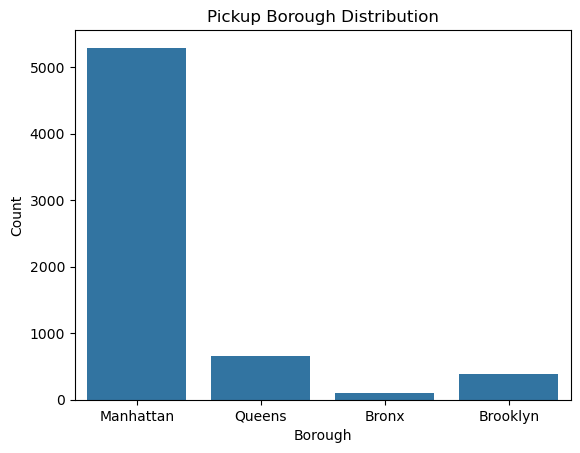

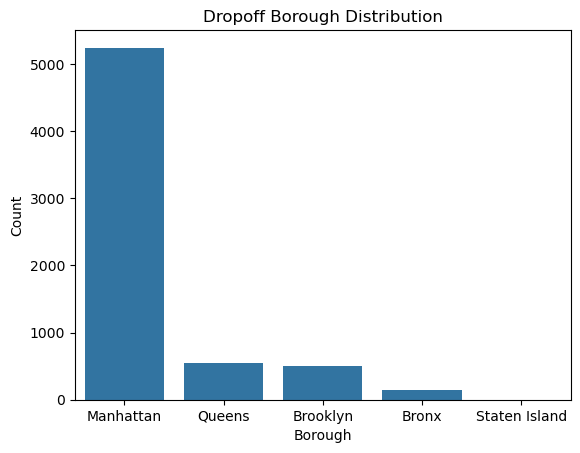

In [44]:
# Pickup Borough
sns.countplot(x='pickup_borough', data=taxis)
plt.title('Pickup Borough Distribution')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

# Dropoff Borough
sns.countplot(x='dropoff_borough', data=taxis)
plt.title('Dropoff Borough Distribution')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()


#### **ANALYSIS:**
These plots will help you see which boroughs have the most frequent pickups and drop-offs.

**e. Correlation Analysis**

Correlation Heatmap: A heatmap can be used to visualize correlations between numerical columns like fare, distance, tip, and total.

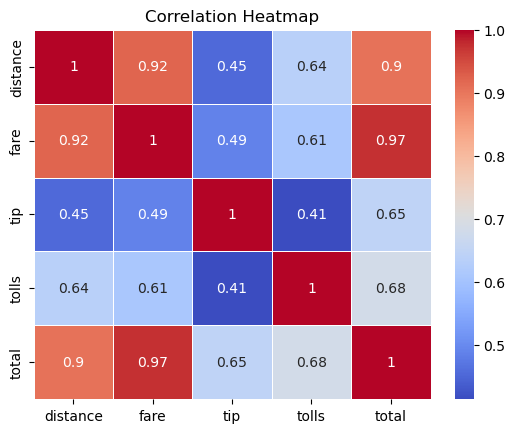

In [45]:
# Correlation heatmap
corr = taxis[['distance', 'fare', 'tip', 'tolls', 'total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### **ANALYSIS**

Total fare is strongly influenced by both Distance and Fare, with additional contributions from Tolls and Tip.

	•	Fare is closely related to Distance and is a key component of the Total fare.
	•	Tips seem to increase with higher Total fares, but they are not significantly influenced by distance or tolls.
	•	Overall, Distance and Fare are the two primary factors driving up the Total fare in this dataset.

## **6. Time-Based Analysis**
Trips by Hour of the Day: Extract the hour from the pickup time to analyze trip patterns by time of day.

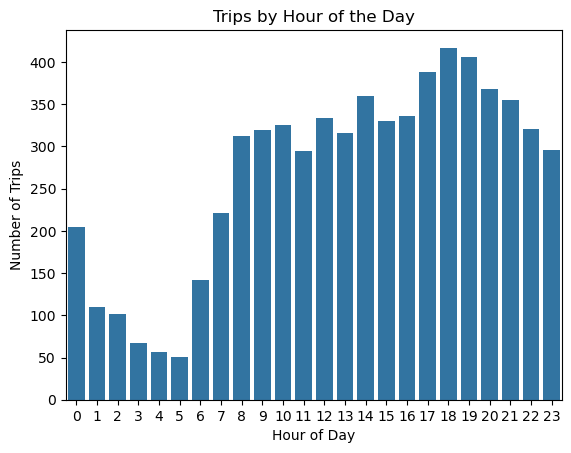

In [46]:
# Extract hour from pickup
taxis['pickup_hour'] = taxis['pickup'].dt.hour

# Plot trips by hour
sns.countplot(x='pickup_hour', data=taxis)
plt.title('Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


#### **ANALYSIS.**
This will help you identify peak hours for taxi rides.